In [13]:
import torch
import torchvision
import numpy as np
from torchvision import datasets, models, transforms

# This is used to transform the images to Tensor and normalize it
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))
])

training = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(training, batch_size=4,shuffle=True, num_workers=2)

testing = torchvision.datasets.MNIST(root='./data', train=False,download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testing, batch_size=4,shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
          '4', '5', '6', '7', '8', '9')


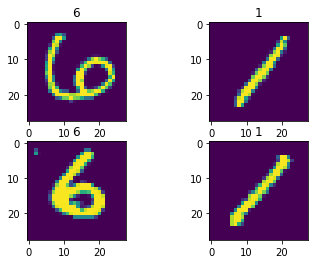

In [14]:
         
import matplotlib.pyplot as plt
import numpy as np

#create an iterator for train_loader
# get random training images
data_iterator = iter(train_loader)
images, labels = data_iterator.next()

#plot 4 images to visualize the data
rows = 2
columns = 2
fig=plt.figure()
for i in range(4):
   fig.add_subplot(rows, columns, i+1)
   plt.title(classes[labels[i]])
   img = images[i] / 2 + 0.5     # this is for unnormalize the image
   img = torchvision.transforms.ToPILImage()(img)
   plt.imshow(img)
plt.show()


In [21]:
torchvision.transforms.ToPILImage()(images[4])

IndexError: index 4 is out of bounds for dimension 0 with size 4

In [22]:
images.shape

torch.Size([4, 1, 28, 28])

In [23]:
import torch.nn as nn

# flatten the tensor into 
class Flatten(nn.Module):
   def forward(self, input):
       return input.view(input.size(0), -1)

#sequential based model
seq_model = nn.Sequential(
           nn.Conv2d(1, 10, kernel_size=5),
           nn.MaxPool2d(2),
           nn.ReLU(),
           nn.Dropout2d(),
           nn.Conv2d(10, 20, kernel_size=5),
           nn.MaxPool2d(2),
           nn.ReLU(),
           Flatten(),
           nn.Linear(320, 50),
           nn.ReLU(),
           nn.Linear(50, 10),
           nn.Softmax(),
         )

net = seq_model
print(net)


Sequential(
  (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5)
  (4): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): ReLU()
  (7): Flatten()
  (8): Linear(in_features=320, out_features=50, bias=True)
  (9): ReLU()
  (10): Linear(in_features=50, out_features=10, bias=True)
  (11): Softmax()
)


In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [25]:
for epoch in range(2): 

#set the running loss at each epoch to zero
   running_loss = 0.0
# we will enumerate the train loader with starting index of 0
# for each iteration (i) and the data (tuple of input and labels)
   for i, data in enumerate(train_loader, 0):
       inputs, labels = data

# clear the gradient
       optimizer.zero_grad()

#feed the input and acquire the output from network
       outputs = net(inputs)

#calculating the predicted and the expected loss
       loss = criterion(outputs, labels)

#compute the gradient
       loss.backward()

#update the parameters
       optimizer.step()

       # print statistics
       running_loss += loss.item()
       if i % 1000 == 0:
           print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 1000))
           running_loss = 0.0


/home/UANDES/da.barbosa10/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[1,     1] loss: 0.002
[1,  1001] loss: 2.302
[1,  2001] loss: 2.297
[1,  3001] loss: 2.206
[1,  4001] loss: 1.976
[1,  5001] loss: 1.806
[1,  6001] loss: 1.758
[1,  7001] loss: 1.754
[1,  8001] loss: 1.735
[1,  9001] loss: 1.733
[1, 10001] loss: 1.721
[1, 11001] loss: 1.715
[1, 12001] loss: 1.719
[1, 13001] loss: 1.705
[1, 14001] loss: 1.717
[2,     1] loss: 0.002
[2,  1001] loss: 1.708
[2,  2001] loss: 1.694
[2,  3001] loss: 1.716
[2,  4001] loss: 1.686
[2,  5001] loss: 1.691
[2,  6001] loss: 1.694
[2,  7001] loss: 1.690
[2,  8001] loss: 1.697
[2,  9001] loss: 1.683
[2, 10001] loss: 1.699
[2, 11001] loss: 1.694
[2, 12001] loss: 1.688
[2, 13001] loss: 1.682
[2, 14001] loss: 1.686


Predicted:      7     2     1     0


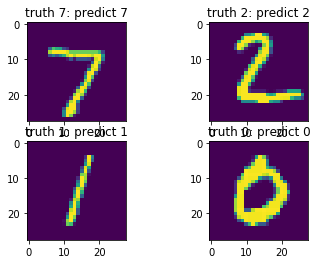

In [26]:
#make an iterator from test_loader
#Get a batch of training images
test_iterator = iter(test_loader)
images, labels = test_iterator.next()

results = net(images)
_, predicted = torch.max(results, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

fig2 = plt.figure()
for i in range(4):
   fig2.add_subplot(rows, columns, i+1)
   plt.title('truth ' + classes[labels[i]] + ': predict ' + classes[predicted[i]])
   img = images[i] / 2 + 0.5     # this is to unnormalize the image
   img = torchvision.transforms.ToPILImage()(img)
   plt.imshow(img)
plt.show()